In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
%pwd
%cd ..

/Users/ENZO/KOOKIZ/GITHUB/translate-handsign


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
actions = ["답답하다", "땀난다", "떨린다", "베였다", "부었다", "불편하다",
           "아프다", "어지럽다", "열", "지속된다", "피곤하다"]
time_num, time_num1, time_num2 = '1744788777', '1744788931', '1744789089'

for time_num in [time_num, time_num1, time_num2]:
    data = np.concatenate([
        np.load(f'dataset/seq_아프다_{time_num}.npy'),
        np.load(f'dataset/seq_열_{time_num}.npy'),
        np.load(f'dataset/seq_답답하다_{time_num}.npy'),
        np.load(f'dataset/seq_땀난다_{time_num}.npy'),
        np.load(f'dataset/seq_떨린다_{time_num}.npy'),
        np.load(f'dataset/seq_베였다_{time_num}.npy'),
        np.load(f'dataset/seq_부었다_{time_num}.npy'),
        np.load(f'dataset/seq_불편하다_{time_num}.npy'),
        np.load(f'dataset/seq_어지럽다_{time_num}.npy'),
        np.load(f'dataset/seq_지속된다_{time_num}.npy'),
        np.load(f'dataset/seq_피곤하다_{time_num}.npy')
    ], axis=0)

data.shape

(477, 10, 56)

In [5]:
print(np.load(f'dataset/seq_아프다_1744773358.npy').shape)
print(np.load(f'dataset/seq_열_1744773358.npy').shape)
print(np.load(f'dataset/seq_기침_1744773358.npy').shape)
print(np.load(f'dataset/seq_콧물_1744773358.npy').shape)
print(np.load(f'dataset/seq_코막힘_1744773358.npy').shape)
print(np.load(f'dataset/seq_머리_1744773358.npy').shape)
print(np.load(f'dataset/seq_배_1744773358.npy').shape)
print(np.load(f'dataset/seq_설사_1744773358.npy').shape)
print(np.load(f'dataset/seq_변비_1744773358.npy').shape)
print(np.load(f'dataset/seq_구토_1744773358.npy').shape)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/seq_아프다_1744773358.npy'

In [6]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(477, 10, 55)
(477,)


In [7]:
labels

array([ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2

In [8]:
len(labels)

477

In [9]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [10]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(477, 11)

In [11]:
y_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [12]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2020)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(381, 10, 55) (381, 11)
(96, 10, 55) (96, 11)


In [13]:
x_train.shape[1:3]

(10, 55)

In [14]:
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [15]:
# custom f1 score
def metric_F1score(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    F1score=2*precision*recall/(precision+recall)
    return F1score

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras as keras

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(len(actions), activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',metric_F1score])
model.summary()

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        30,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,163 (129.54 KB)

 Trainable params: 33,163 (129.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_metric_F1score', min_delta = 0, patience = 20, mode = 'max')


history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/multi_hand_gesture_classifier.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_metric_F1score', factor=0.5, patience=50, verbose=1, mode='auto'),
        early_stopping
    ]
)

Epoch 1/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - acc: 0.0625 - loss: 20.1338 - metric_f1score: 0.0678
Epoch 1: val_acc improved from -inf to 0.09375, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.0640 - loss: 13.8531 - metric_f1score: nan - val_acc: 0.0938 - val_loss: 5.1632 - val_metric_f1score: nan - learning_rate: 0.0010
Epoch 2/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.0000e+00 - loss: 6.6527 - metric_f1score: nan
Epoch 2: val_acc improved from 0.09375 to 0.30208, saving model to models/multi_hand_gesture_classifier.h5


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_metric_F1score` which is not available. Available metrics are: acc,loss,metric_f1score,val_acc,val_loss,val_metric_f1score,learning_rate.
  callback.on_epoch_end(epoch, logs)
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_metric_F1score` which is not available. Available metrics are: acc,loss,metric_f1score,val_acc,val_loss,val_metric_f1score,learning_rate
  current = self.get_monitor_value(logs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.1277 - loss: 6.2974 - metric_f1score: nan - val_acc: 0.3021 - val_loss: 3.7577 - val_metric_f1score: 0.1604 - learning_rate: 0.0010
Epoch 3/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.2188 - loss: 3.7534 - metric_f1score: 0.1951
Epoch 3: val_acc improved from 0.30208 to 0.55208, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3104 - loss: 3.9988 - metric_f1score: 0.1993 - val_acc: 0.5521 - val_loss: 3.1353 - val_metric_f1score: 0.2302 - learning_rate: 0.0010
Epoch 4/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.3125 - loss: 3.8223 - metric_f1score: 0.1000
Epoch 4: val_acc improved from 0.55208 to 0.60417, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3798 - loss: 3.5563 - metric_f1score: 0.1869 - val_acc: 0.6042 - val_loss: 2.9326 - val_metric_f1score: 0.2424 - learning_rate: 0.0010
Epoch 5/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.3750 - loss: 4.9866 - metric_f1score: 0.1538
Epoch 5: val_acc improved from 0.60417 to 0.61458, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4076 - loss: 3.6961 - metric_f1score: 0.2130 - val_acc: 0.6146 - val_loss: 2.8216 - val_metric_f1score: 0.3062 - learning_rate: 0.0010
Epoch 6/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.3125 - loss: 4.3162 - metric_f1score: 0.1905
Epoch 6: val_acc improved from 0.61458 to 0.73958, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4406 - loss: 3.3176 - metric_f1score: 0.2831 - val_acc: 0.7396 - val_loss: 2.6568 - val_metric_f1score: 0.3803 - learning_rate: 0.0010
Epoch 7/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.4062 - loss: 3.0568 - metric_f1score: 0.2051
Epoch 7: val_acc improved from 0.73958 to 0.76042, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4865 - loss: 2.9132 - metric_f1score: 0.3202 - val_acc: 0.7604 - val_loss: 2.4743 - val_metric_f1score: 0.4932 - learning_rate: 0.0010
Epoch 8/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.4688 - loss: 3.1562 - metric_f1score: 0.2791
Epoch 8: val_acc improved from 0.76042 to 0.79167, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5263 - loss: 2.8870 - metric_f1score: 0.3752 - val_acc: 0.7917 - val_loss: 2.3201 - val_metric_f1score: 0.5064 - learning_rate: 0.0010
Epoch 9/200
10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6354 - loss: 2.5226 - metric_f1score: 0.5050 
Epoch 9: val_acc improved from 0.79167 to 0.81250, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.6312 - loss: 2.5252 - metric_f1score: 0.5007 - val_acc: 0.8125 - val_loss: 2.1074 - val_metric_f1score: 0.5644 - learning_rate: 0.0010
Epoch 10/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.5625 - loss: 2.5797 - metric_f1score: 0.4000
Epoch 10: val_acc did not improve from 0.81250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5993 - loss: 2.3808 - metric_f1score: 0.5231 - val_acc: 0.8125 - val_loss: 1.8053 - val_metric_f1score: 0.6456 - learning_rate: 0.0010
Epoch 11/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.6562 - loss: 2.2418 - metric_f1score: 0.4783
Epoch 11: val_acc did not improve from 0.81250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.6703 - loss: 1.9738 - metric_f1score: 0.6428 - val_acc: 0.8125 - val_loss: 1.6601 - val_metric_f1score: 0.8031 - learning_rate: 0.0010
Epoch 12/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.6250 - loss: 2.6576 - metric_f1score: 0.6038
Epoch 12: val_acc improved from 0.8

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7071 - loss: 2.0338 - metric_f1score: 0.6841 - val_acc: 0.8333 - val_loss: 1.6070 - val_metric_f1score: 0.8111 - learning_rate: 0.0010
Epoch 13/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.7188 - loss: 2.2057 - metric_f1score: 0.6000
Epoch 13: val_acc did not improve from 0.83333
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7257 - loss: 1.7958 - metric_f1score: 0.7183 - val_acc: 0.8229 - val_loss: 1.4736 - val_metric_f1score: 0.8447 - learning_rate: 0.0010
Epoch 14/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.7500 - loss: 1.6897 - metric_f1score: 0.7308
Epoch 14: val_acc improved from 0.83333 to 0.85417, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7382 - loss: 1.6536 - metric_f1score: 0.7443 - val_acc: 0.8542 - val_loss: 1.3697 - val_metric_f1score: 0.8763 - learning_rate: 0.0010
Epoch 15/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.7188 - loss: 1.9261 - metric_f1score: 0.7407
Epoch 15: val_acc did not improve from 0.85417
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7526 - loss: 1.7503 - metric_f1score: 0.7549 - val_acc: 0.8438 - val_loss: 1.3351 - val_metric_f1score: 0.8899 - learning_rate: 0.0010
Epoch 16/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.5938 - loss: 1.9344 - metric_f1score: 0.6538
Epoch 16: val_acc improved from 0.85417 to 0.88542, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7442 - loss: 1.6359 - metric_f1score: 0.7541 - val_acc: 0.8854 - val_loss: 1.2063 - val_metric_f1score: 0.8912 - learning_rate: 0.0010
Epoch 17/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.6875 - loss: 1.7864 - metric_f1score: 0.8000
Epoch 17: val_acc improved from 0.88542 to 0.89583, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7361 - loss: 1.6080 - metric_f1score: 0.7980 - val_acc: 0.8958 - val_loss: 1.1911 - val_metric_f1score: 0.9026 - learning_rate: 0.0010
Epoch 18/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.7188 - loss: 1.7153 - metric_f1score: 0.6923
Epoch 18: val_acc did not improve from 0.89583
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7857 - loss: 1.4949 - metric_f1score: 0.7860 - val_acc: 0.8958 - val_loss: 1.1037 - val_metric_f1score: 0.9327 - learning_rate: 0.0010
Epoch 19/200
 8/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7932 - loss: 1.4136 - metric_f1score: 0.8004 
Epoch 19: val_acc improved from 0.89583 to 0.91667, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.7959 - loss: 1.4145 - metric_f1score: 0.8027 - val_acc: 0.9167 - val_loss: 1.0664 - val_metric_f1score: 0.9327 - learning_rate: 0.0010
Epoch 20/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.7188 - loss: 1.4443 - metric_f1score: 0.8070
Epoch 20: val_acc did not improve from 0.91667
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8125 - loss: 1.3427 - metric_f1score: 0.8257 - val_acc: 0.9062 - val_loss: 1.0444 - val_metric_f1score: 0.9319 - learning_rate: 0.0010
Epoch 21/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.8125 - loss: 1.3693 - metric_f1score: 0.8621
Epoch 21: val_acc improved from 0.91667 to 0.95833, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8491 - loss: 1.2433 - metric_f1score: 0.8669 - val_acc: 0.9583 - val_loss: 0.9888 - val_metric_f1score: 0.9218 - learning_rate: 0.0010
Epoch 22/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.7812 - loss: 1.4584 - metric_f1score: 0.8070
Epoch 22: val_acc improved from 0.95833 to 0.96875, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8401 - loss: 1.3039 - metric_f1score: 0.8374 - val_acc: 0.9688 - val_loss: 0.9099 - val_metric_f1score: 0.9495 - learning_rate: 0.0010
Epoch 23/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.7812 - loss: 1.2805 - metric_f1score: 0.8276
Epoch 23: val_acc did not improve from 0.96875
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8553 - loss: 1.1726 - metric_f1score: 0.8707 - val_acc: 0.9688 - val_loss: 0.8823 - val_metric_f1score: 0.9729 - learning_rate: 0.0010
Epoch 24/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.8438 - loss: 1.0978 - metric_f1score: 0.8667
Epoch 24: val_acc improved from 0.96875 to 0.98958, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8770 - loss: 1.0880 - metric_f1score: 0.8819 - val_acc: 0.9896 - val_loss: 0.8192 - val_metric_f1score: 0.9783 - learning_rate: 0.0010
Epoch 25/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.8438 - loss: 1.1929 - metric_f1score: 0.8276
Epoch 25: val_acc did not improve from 0.98958
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8763 - loss: 1.1536 - metric_f1score: 0.8757 - val_acc: 0.9896 - val_loss: 0.7895 - val_metric_f1score: 0.9894 - learning_rate: 0.0010
Epoch 26/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.8750 - loss: 0.9093 - metric_f1score: 0.8852
Epoch 26: val_acc improved from 0.98958 to 1.00000, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9024 - loss: 0.9813 - metric_f1score: 0.9088 - val_acc: 1.0000 - val_loss: 0.7652 - val_metric_f1score: 0.9892 - learning_rate: 0.0010
Epoch 27/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.9062 - loss: 1.1105 - metric_f1score: 0.8814
Epoch 27: val_acc did not improve from 1.00000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9044 - loss: 1.0201 - metric_f1score: 0.8997 - val_acc: 1.0000 - val_loss: 0.7419 - val_metric_f1score: 0.9840 - learning_rate: 0.0010
Epoch 28/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.9375 - loss: 1.0216 - metric_f1score: 0.9206
Epoch 28: val_acc did not improve from 1.00000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9276 - loss: 0.9677 - metric_f1score: 0.9219 - val_acc: 0.9896 - val_loss: 0.7417 - val_metric_f1score: 0.9894 - learning_rate: 0.0010
Epoch 29/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.9062 - loss: 0.9514 - metric_f1score: 0.8621
Epoch 29: val_acc did not improve fr

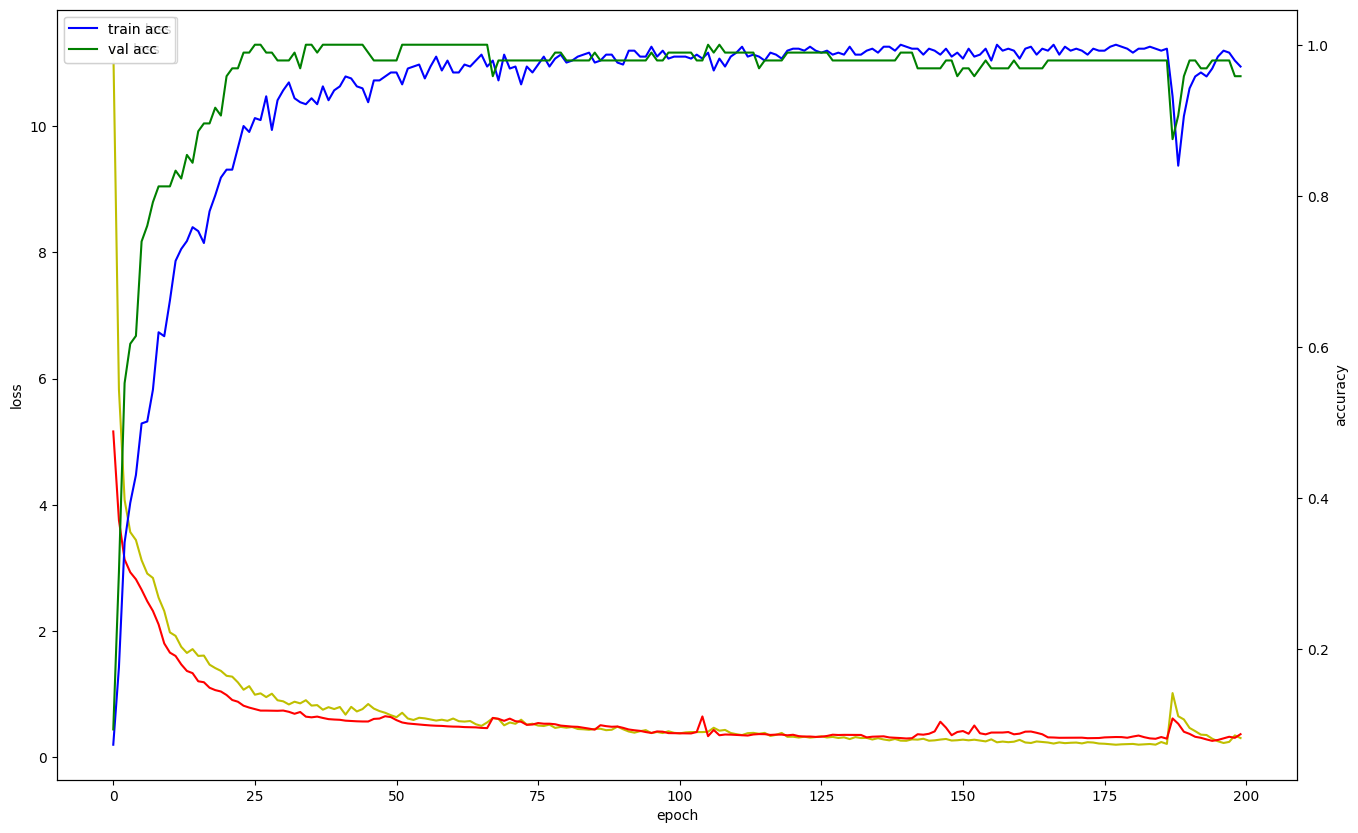

In [18]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

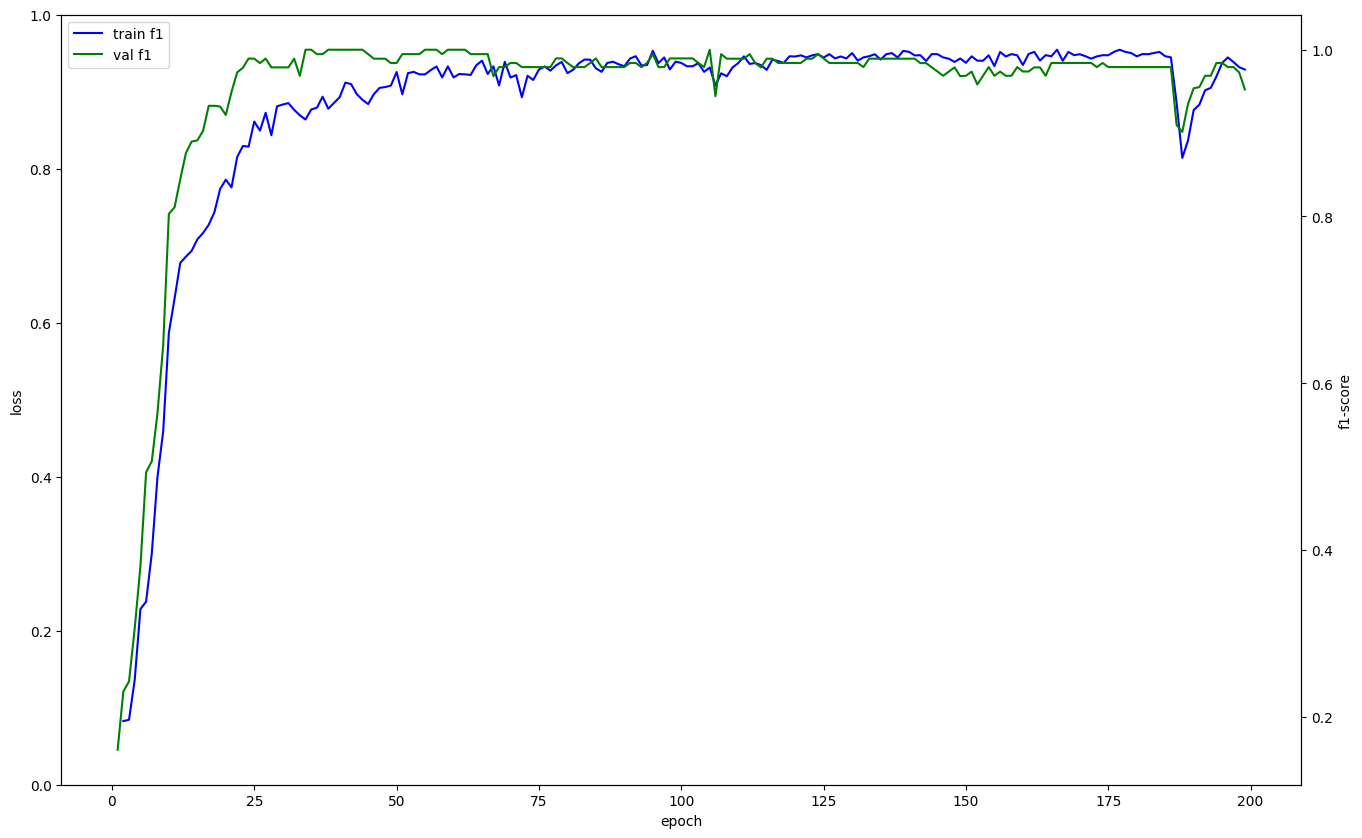

In [19]:
fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['metric_f1score'], 'b', label='train f1')
acc_ax.plot(history.history['val_metric_f1score'], 'g', label='val f1')
acc_ax.set_ylabel('f1-score')
acc_ax.legend(loc='upper left')

plt.show()

In [20]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/multi_hand_gesture_classifier.h5', custom_objects = {'metric_F1score':metric_F1score})

y_pred = model.predict(x_val)
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


array([[[88,  0],
        [ 0,  8]],

       [[91,  0],
        [ 0,  5]],

       [[90,  0],
        [ 0,  6]],

       [[84,  0],
        [ 0, 12]],

       [[91,  0],
        [ 0,  5]],

       [[88,  0],
        [ 0,  8]],

       [[89,  0],
        [ 0,  7]],

       [[78,  0],
        [ 0, 18]],

       [[87,  0],
        [ 0,  9]],

       [[87,  0],
        [ 0,  9]],

       [[87,  0],
        [ 0,  9]]])

In [21]:
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[88,  0],
        [ 0,  8]],

       [[91,  0],
        [ 0,  5]],

       [[90,  0],
        [ 0,  6]],

       [[84,  0],
        [ 0, 12]],

       [[91,  0],
        [ 0,  5]],

       [[88,  0],
        [ 0,  8]],

       [[89,  0],
        [ 0,  7]],

       [[78,  0],
        [ 0, 18]],

       [[87,  0],
        [ 0,  9]],

       [[87,  0],
        [ 0,  9]],

       [[87,  0],
        [ 0,  9]]])

In [22]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/multi_hand_gesture_classifier.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


array([[[88,  0],
        [ 0,  8]],

       [[91,  0],
        [ 0,  5]],

       [[90,  0],
        [ 0,  6]],

       [[84,  0],
        [ 0, 12]],

       [[91,  0],
        [ 0,  5]],

       [[88,  0],
        [ 0,  8]],

       [[89,  0],
        [ 0,  7]],

       [[78,  0],
        [ 0, 18]],

       [[87,  0],
        [ 0,  9]],

       [[87,  0],
        [ 0,  9]],

       [[87,  0],
        [ 0,  9]]])

In [23]:
import tensorflow as tf
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 1. TF Lite 기본 연산 + Select TF ops 사용
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]

# 2. TensorList lowering 비활성화
converter._experimental_lower_tensor_list_ops = False

# 변환 실행
tflite_model = converter.convert()

# 모델 저장
with open('models/multi_hand_gesture_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpet5yt_an/assets


INFO:tensorflow:Assets written to: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpet5yt_an/assets


Saved artifact at '/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpet5yt_an'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10, 55), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  13015399968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13015386768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13015461456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13015540032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13015537568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13015544608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13015664416: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1744790883.470609  257118 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1744790883.470875  257118 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-16 17:08:03.471195: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpet5yt_an
2025-04-16 17:08:03.471820: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-16 17:08:03.471829: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpet5yt_an
I0000 00:00:1744790883.478353  257118 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-04-16 17:08:03.479258: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-16 17:08:03.519910: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder